# AML Assignment 1
## Varun Agrawal 
## MDS202251

prepare.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import regex as re
import numpy as np
import os, sys, random
import nltk
from collections import Counter
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import wordnet 
import string
from nltk.corpus import stopwords
from contractions import fix


stop_words=set(stopwords.words('english'))

In [2]:
data_file = open("./data/emails.csv")
email_data_list = data_file.readlines()

In [3]:
print(len(email_data_list))

5729


In [4]:
email_data_list[:3]

['"text","spam"\n',
 '"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . af

In [5]:
mails = pd.read_csv("./data/emails.csv", skiprows=[0], names=["text", "spam"])
print(mails)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


In [6]:
mails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
mails.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [8]:
mails['length'] = mails['text'].map(lambda text: len(text))

In [9]:
mails.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


<AxesSubplot: ylabel='Frequency'>

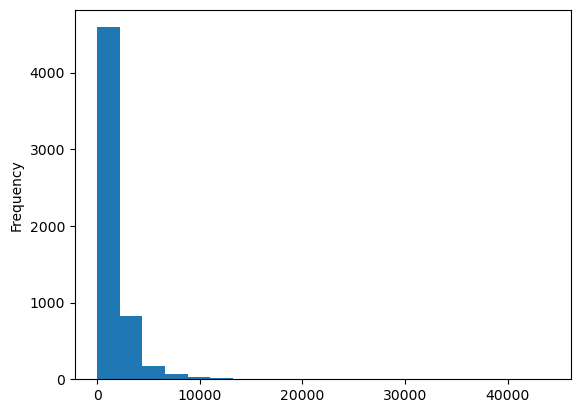

In [10]:
mails.length.plot(bins=20, kind='hist')

In [11]:
mails.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

Pre Processing

In [12]:
# Splitting the mails in tokens
def split_into_tokens(data):
    tokenized_words = []
    regex=r"\w+"
    
    for i in range(len(data.text)):
        tokenized_words.append(re.findall(regex, data.text[i]))
        
    return tokenized_words

In [13]:
#Function to perform lematization and stopword removal
def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    
    for i in range(len(data)):
        temp = []

        for j in range(len(data[i])):
        
            if data[i][j].lower() in stop_words:
                continue
            
            elif data[i][j] in string.punctuation:
                continue
            
            else:
                temp.append(str(lemmatizer.lemmatize(data[i][j]).lower()))

        lemmatized_words.append(temp)             

    return lemmatized_words

In [14]:
token_words = split_into_tokens(mails)
processed_words = lemmatize(token_words)

mails['processed_mails'] = processed_words

In [15]:
mails.head()

,text,spam,length,processed_mails
0,Subject: naturally irresistible your corporate...,1,1484,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[subject, unbelievable, new, home, made, easy,..."
3,Subject: 4 color printing special request add...,1,500,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,235,"[subject, money, get, software, cd, software, ..."


Splitting the data 

In [16]:
#Train-validation and test split
train_test_split_size = 0.1
X_train_val, X_test, y_train_val, y_test = train_test_split(mails.processed_mails, mails.spam, test_size = train_test_split_size, random_state = 42)

In [17]:
#Train and Validation split
train_val_split_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = train_val_split_size, random_state = 42)

In [18]:
#Creating the splitted dataframes
train_df = pd.DataFrame({'X_train': X_train,'y_train': y_train})
val_df = pd.DataFrame({'X_val': X_val,'y_val': y_val})
test_df = pd.DataFrame({'X_test': X_test,'y_test': y_test})

In [19]:
train_df.to_csv('./data/train.csv',index = False)
val_df.to_csv('./data/validation.csv',index = False)
test_df.to_csv('./data/test.csv',index = False)
mails.to_csv('./data/modified_df.csv',index = False)